# Exercise 1

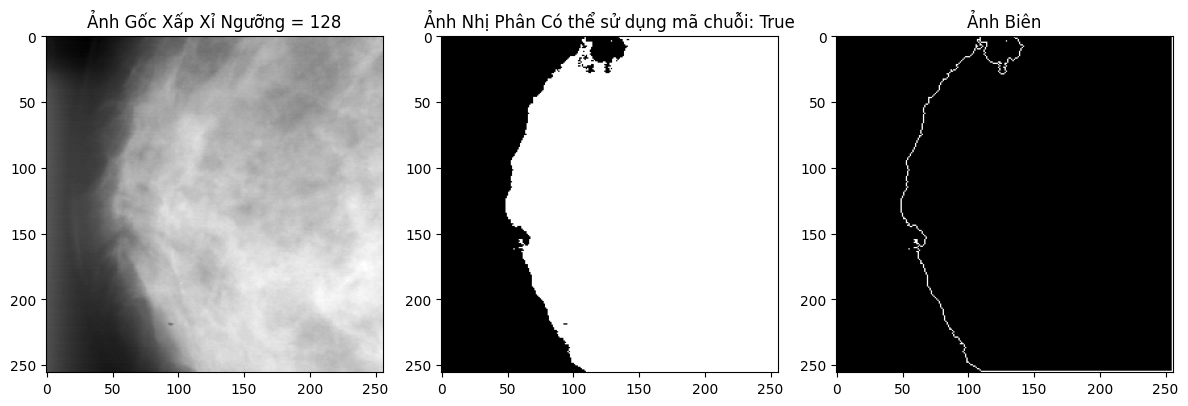

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def convert_to_binary_image(image, threshold):
    binary_image = np.where(image > threshold, 255, 0).astype(np.uint8)
    return binary_image

def generate_contour_image(binary_image):
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_image = np.zeros_like(binary_image)
    cv2.drawContours(contour_image, contours, -1, 255, thickness=1)
    return contour_image

def can_use_chain_code(contour_image):
    contours, _ = cv2.findContours(contour_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return len(contours) < 10

def main():
    image = np.fromfile('mammogrambin256.sec', dtype=np.uint8).reshape(256, 256)

    threshold_value = 128
    binary_image = convert_to_binary_image(image, threshold_value)
    contour_image = generate_contour_image(binary_image)
    can_use = can_use_chain_code(contour_image)

    plt.figure(figsize=(12, 8))

    plt.subplot(131)
    plt.imshow(image, cmap='gray')
    plt.title(f'Ảnh Gốc Xấp Xỉ Ngưỡng = {threshold_value}')

    plt.subplot(132)
    plt.imshow(binary_image, cmap='gray')
    plt.title(f'Ảnh Nhị Phân Có thể sử dụng mã chuỗi: {can_use}')

    plt.subplot(133)
    plt.imshow(contour_image, cmap='gray')
    plt.title('Ảnh Biên')

    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    main()


# Exercise 2

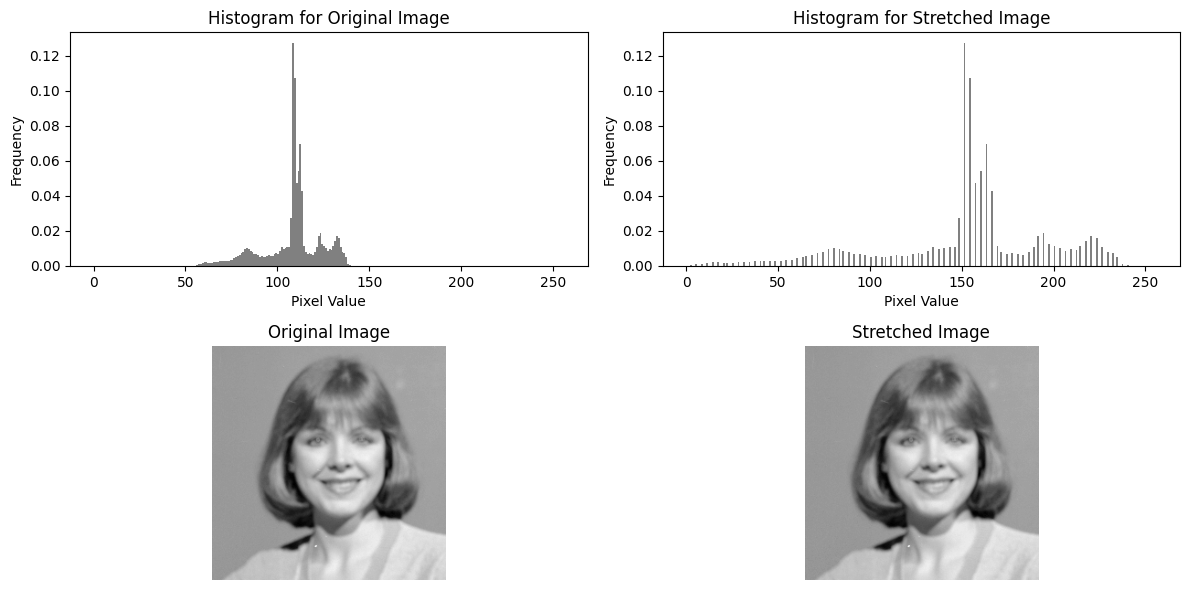

In [3]:
import numpy as np
import matplotlib.pyplot as plt

image = np.fromfile('ladybin.sec', dtype=np.uint8).reshape(256, 256)

min_pixel_value = np.min(image)
max_pixel_value = np.max(image)
stretched_image = ((image - min_pixel_value) / (max_pixel_value - min_pixel_value) * 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

plt.subplot(221)
plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Histogram for Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(222)
plt.hist(stretched_image.ravel(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Histogram for Stretched Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()

plt.subplot(223)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(224)
plt.imshow(stretched_image, cmap='gray')
plt.title('Stretched Image')
plt.axis('off')

plt.tight_layout()
plt.show()


# Exercise 3

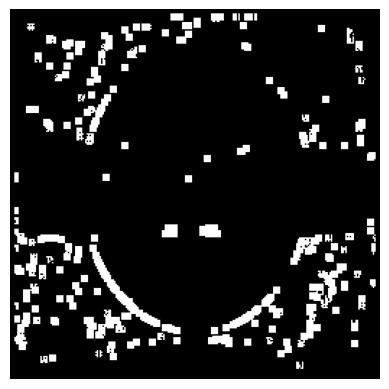

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

input_image = np.fromfile("actontBinBin.sec", dtype=np.uint8).reshape(256,256)

template = np.array([[0, 1, 0],
                     [1, 1, 1],
                     [0, 1, 0]], dtype=np.uint8)

neighborhood_size = template.shape[-1]

def calculate_match_measure(image, template):
    neighborhood = image.copy()
    neighborhood = neighborhood.astype(np.uint8)
    match_measure = cv2.matchTemplate(neighborhood, template, cv2.TM_CCORR_NORMED)
    return match_measure

output_image = np.zeros_like(input_image, dtype=np.float32)
for i in range(neighborhood_size, input_image.shape[0] - neighborhood_size):
    for j in range(neighborhood_size, input_image.shape[1] - neighborhood_size):
        neighborhood = input_image[i-neighborhood_size:i+neighborhood_size+1, j-neighborhood_size:j+neighborhood_size+1]
        match_measure = calculate_match_measure(neighborhood, template)
        output_image[i, j] = match_measure.max()
threshold_value = 0.8
binary_image = np.where(output_image >= threshold_value, 255, 0)

plt.imshow(binary_image, cmap='gray')
plt.axis('off')
plt.show()


# Exercise 4

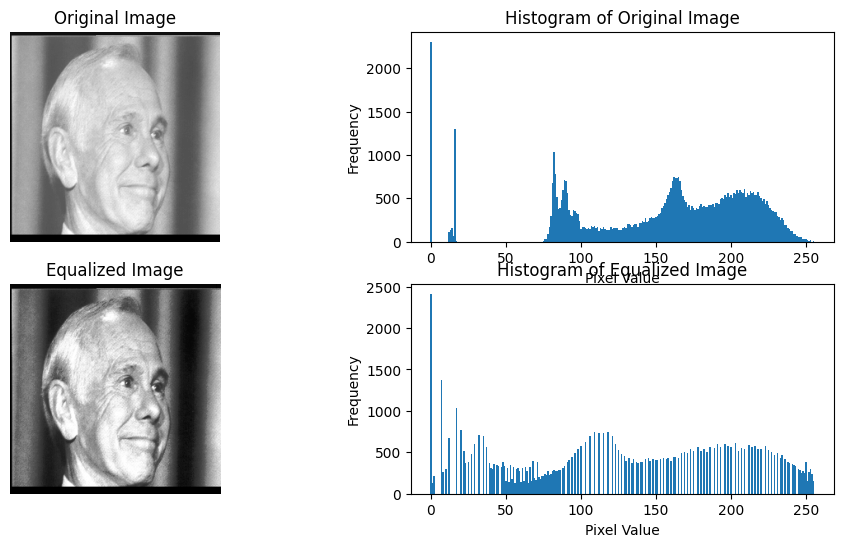

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

image = np.fromfile("johnnybin.sec", dtype=np.uint8).reshape(256,256)

hist_original, bins = np.histogram(image, bins=256, range=[0, 256])

plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(222)
plt.bar(bins[:-1], hist_original, width=1)
plt.title("Histogram of Original Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

equ_image = cv2.equalizeHist(image)
hist_equ, bins = np.histogram(equ_image, bins=256, range=[0, 256])

plt.subplot(223)
plt.imshow(equ_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.subplot(224)
plt.bar(bins[:-1], hist_equ, width=1)
plt.title("Histogram of Equalized Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()
